1. Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.
2. Add meaningful names for each column.
3. Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1

In [43]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

cols = ['Class_Type', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'Odor'
        , 'gill-attachment', 'gill-space' , 'gill-size', 'Gill_Color', 'stalk-shape'
        , 'stalk-root', 'stalk-sur-above', 'stalk-sur-below', 'stalk-col-above'
        , 'stalk-col-below', 'veil-type', 'veil-color', 'ring-num', 'ring-type'
        , 'spore', 'pop', 'habitat']

eat = {'number': {'e': 0, 'p':1}, 'name': {'e': 'Edible', 'p': 'Poisonous'}}

smell = {'number': {'a' : 0,'l' : 1,'c' : 2,'y' : 3,'f' : 4,'m' : 5,'n' : 6,'p' : 7,'s' : 8},
             'name': {'a' : 'Almond','l' : 'Anise','c' : 'Creosote','y' : 'Fishy',
                      'f' : 'Foul','m' : 'Musty','n' : 'None','p' : 'Pungent','s' : 'Spicy'}}

color = {'number': {'k':0,'n':1,'b':2,'h':3,'g':4,'r':5,
         'o':6,'p':7,'u':8,'e':9,'w':10,'y':11},
             'name': {'k':'Black','n':'Brown','b':'Buff','h':'Chocolate','g':'Gray','r':'Green',
         'o':'Orange','p':'Pink','u':'Purple','e':'Red','w':'White','y':'Yellow'}}


df = pd.read_table('/Users/Maureen/Desktop/GitHub/IS362/mushroom.txt', delimiter=',', header=None)
df.columns = cols

colname = ['Class_Name', 'Odor_Name', 'Gill_Color_Name']
#shroom = df[['classes', 'odor', 'gillcolor']]
#this gave me warnings when I tried to map new values, told me to use .loc instead

shroom = df.loc[:, ['Class_Type', 'Odor', 'Gill_Color']]
shroom2 = df.loc[:, ['Class_Type', 'Odor', 'Gill_Color']]
shroom2.columns = colname
shroom = pd.concat([shroom, shroom2], axis=1)
shroom.Class_Type = shroom.Class_Type.map(eat['number'])
shroom.Odor = shroom.Odor.map(smell['number'])
shroom.Gill_Color = shroom.Gill_Color.map(color['number'])
shroom.Class_Name = shroom.Class_Name.map(eat['name'])
shroom.Odor_Name = shroom.Odor_Name.map(smell['name'])
shroom.Gill_Color_Name = shroom.Gill_Color_Name.map(color['name'])
shroom.head()

,Class_Type,Odor,Gill_Color,Class_Name,Odor_Name,Gill_Color_Name
0,1,7,0,Poisonous,Pungent,Black
1,0,0,0,Edible,Almond,Black
2,0,1,1,Edible,Anise,Brown
3,1,7,1,Poisonous,Pungent,Brown
4,0,6,0,Edible,None,Black


I made a separate df substituting names for the abbreviations

In [4]:
shroom_name = df.loc[:, ['classes', 'odor', 'gillcolor']]
shroom_name.classes = shroom_name.classes.map(eat['name'])
shroom_name.odor = shroom_name.odor.map(smell['name'])
shroom_name.gillcolor = shroom_name.gillcolor.map(color['name'])
shroom_name.head()

,classes,odor,gillcolor
0,Poisonous,Pungent,Black
1,Edible,Almond,Black
2,Edible,Anise,Brown
3,Poisonous,Pungent,Brown
4,Edible,None,Black


4 - Perform exploratory data analysis: 
    - show the distribution of data for each of the columns you selected
    - show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.


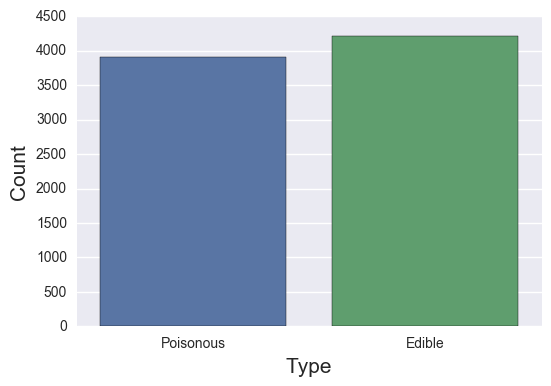

In [44]:
a = sns.countplot(x="Class_Name", data=shroom)
plt.xlabel("Type",size = 15)
plt.ylabel("Count",size = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

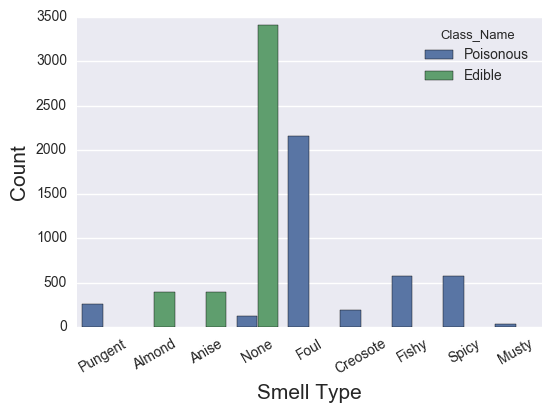

In [45]:
b = sns.countplot(x="Odor_Name", data=shroom, hue='Class_Name')
plt.xlabel("Smell Type",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

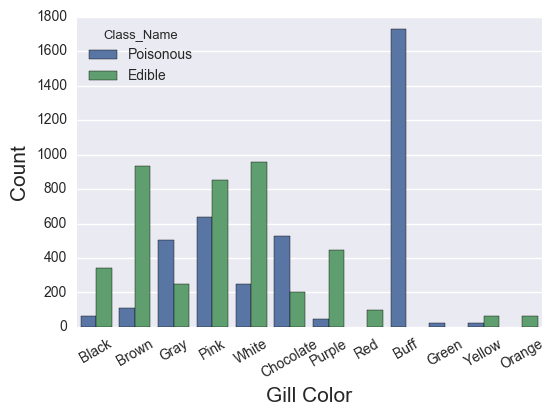

In [46]:
c = sns.countplot(x="Gill_Color_Name", data=shroom, hue='Class_Name')
plt.xlabel("Gill Color",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(rotation=30)

Side note: What does buff smell like??

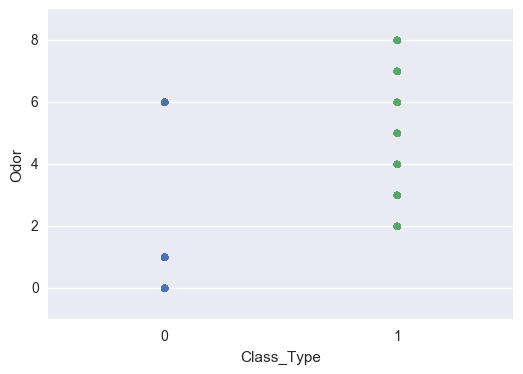

In [50]:
sns.stripplot(x='Class_Type', y='Odor', data=shroom)

([<matplotlib.axis.XTick at 0x119994be0>,
 <a list of 2 Text xticklabel objects>)

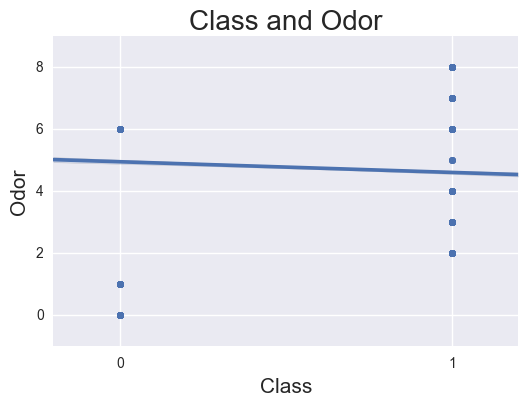

In [51]:
d = sns.regplot(x='Class_Type', y="Odor", data=shroom)
plt.title('Class and Odor', fontsize=20)
plt.xlabel("Class",size = 15)
plt.ylabel("Odor",size = 15)
plt.xticks([0, 1])

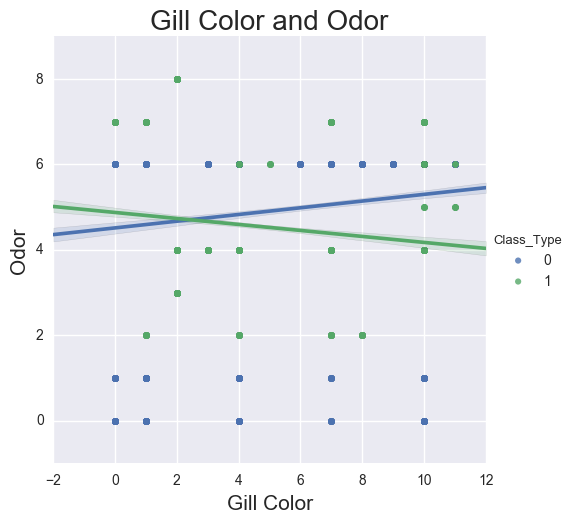

In [52]:
e = sns.lmplot(x='Gill_Color', y="Odor", data=shroom, hue='Class_Type')
plt.title('Gill Color and Odor', fontsize=20)
plt.xlabel("Gill Color",size = 15)
plt.ylabel("Odor",size = 15)

([<matplotlib.axis.XTick at 0x11e04a978>,
 <a list of 2 Text xticklabel objects>)

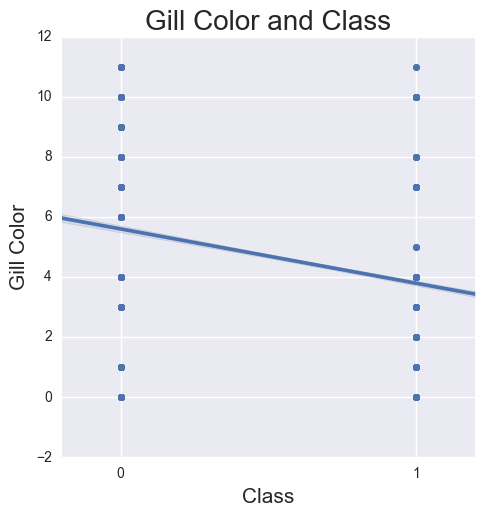

In [67]:
f = sns.lmplot(x='Class_Type', y="Gill_Color", data=shroom)
plt.title('Gill Color and Class', fontsize=20)
plt.xlabel("Class",size = 15)
plt.ylabel("Gill Color",size = 15)
plt.xticks([0, 1])

The Gill Color looks like it will be helpful in determining wether the mushroom is poisonous or not, but not as helpful as Odor. For example, a brown mushroom with no smell will likely be edible (eg. baby bella mushrooms).
Many odors seems associated only with 

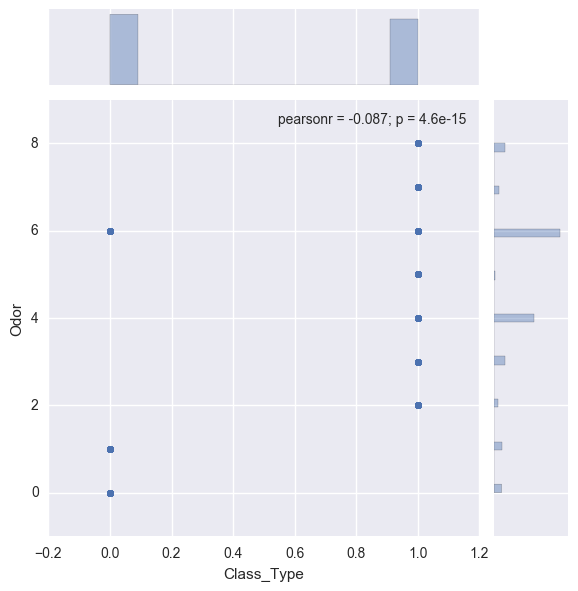

In [66]:
sns.jointplot(x='Class_Type', y='Odor', data=shroom)